# LSTM for Student Academic Performance Evaluation:


Description: This algorithm analyzes student performance using an LSTM model. The input data includes 
student academic performance metrics, and the output is a prediction of good performers, poor 
performers, students who require support and the dropouts
Input: semester percentages
Output: A binary classification indicating whether a student is a good performer or bad performer or 
requiring support or dropout
Procedure:
1. Import required libraries for data analysis, data cleaning, visualization, and LSTM modeling.
2. Load the dataset of student academic performance metrics 
3. Clean the data 
4. Evaluate the academic performance of good performers, poor performers, student who require 
support, student dropouts, students with placement eligibility by calculating their cumulative 
percentage and display the output.
5. Visualize the critical values as graphs across all students 
6. Visualize the critical values as graphs across all students
7. Prepare the data for the LSTM model by separating input features and the target variable.
8. Split the data into training and testing sets 
9. Reshape the input data into the required format for LSTM modeling.
10. Build and compile the LSTM model 
11. Train the LSTM model on the training data.
12. Evaluate the LSTM model and print accuracies of trained LSTM model.

In [1]:
import csv
import random

# Define the number of students and semesters
num_students = 2000
num_semesters = 3

# Open a new CSV file for writing
with open('student_perfor1.csv', 'w', newline='') as csvfile:
    # Define the CSV writer
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['Student ID', 'Semester 1', 'Semester 2', 'Semester 3', 'Attendance', 'Extracurricular', 'Awards', 'Coding'])

    # Generate and write the data for each student
    for i in range(num_students):
        row = [f'Student {i+1}']
        for j in range(num_semesters):
            row.append(random.randint(0, 100))
        row.append(random.randint(0, 100))
        row.append(random.randint(0, 1))
        row.append(random.randint(0, 5))
        row.append(random.randint(0, 3))
        writer.writerow(row)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [ ]:
data = pd.read_csv('student_perfor1.csv')

In [ ]:
data = data.dropna()

In [ ]:
data['cumulative_percentage'] = data.mean(axis=1)
data['good_performance'] = np.where(data['cumulative_percentage'] >= 60, 1, 0)
data['poor_performance'] = np.where(data['cumulative_percentage'] < 40, 1, 0)
data['support_required'] = np.where((data['cumulative_percentage'] >= 40) & (data['cumulative_percentage'] < 60), 1, 0)
data['dropout'] = np.where(data.min(axis=1) < 35, 1, 0)
data['eligible_for_placement'] = np.where((data['cumulative_percentage'] >= 65) & (data['Coding'] | data['Awards'] | data['Extracurricular']), 1, 0)

<AxesSubplot:>

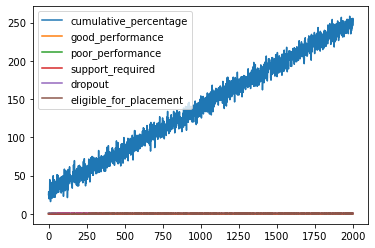

In [ ]:
data[['cumulative_percentage', 'good_performance', 'poor_performance', 'support_required', 'dropout', 'eligible_for_placement']].plot(kind='line')

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
#here we encoding the labels as we have the student id's is non numeric
le = LabelEncoder()
X.iloc[:, 0] = le.fit_transform(X.iloc[:, 0])



In [ ]:
# scale the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [ ]:
#here we are reshaping the data which is on eof the important step for lstm model
X = X.reshape(X.shape[0], 1, X.shape[1])

In [ ]:
#here we are splitting the data  into training and testing data
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]



In [ ]:
#here the lstm model is created
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))



In [ ]:
# compiling the model
model.compile(optimizer='adam', loss='mse')



In [ ]:
# fitting the model to the training data 
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Train on 1440 samples, validate on 160 samples
Epoch 1/50
1440/1440 [==============================] - 1s 570us/sample - loss: 0.3599 - val_loss: 0.1999


C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Epoch 2/50
1440/1440 [==============================] - 0s 76us/sample - loss: 0.1730 - val_loss: 0.1928
Epoch 3/50
1440/1440 [==============================] - 0s 71us/sample - loss: 0.1515 - val_loss: 0.1889
Epoch 4/50
1440/1440 [==============================] - 0s 89us/sample - loss: 0.1453 - val_loss: 0.1887
Epoch 5/50
1440/1440 [==============================] - 0s 89us/sample - loss: 0.1453 - val_loss: 0.1899
Epoch 6/50
1440/1440 [==============================] - 0s 91us/sample - loss: 0.1457 - val_loss: 0.1984
Epoch 7/50
1440/1440 [==============================] - 0s 82us/sample - loss: 0.1465 - val_loss: 0.1839
Epoch 8/50
1440/1440 [==============================] - 0s 77us/sample - loss: 0.1440 - val_loss: 0.1847
Epoch 9/50
1440/1440 [==============================] - 0s 87us/sample - loss: 0.1444 - val_loss: 0.1829
Epoch 10/50
1440/1440 [==============================] - 0s 88us/sample - loss: 0.1453 - val_loss: 0.1917
Epoch 11/50
1440/1440 [==============================]

In [ ]:

# here we are evaluate the model on the test data
model.evaluate(X_test, y_test)



0.17417894065380096

In [ ]:
# here we are make predictions from the test data we created
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)



In [ ]:
# so here we are converting predictions from probabilities to class labels using the argmax from numpy library.
y_pred = np.argmax(y_pred, axis=1)



In [ ]:
# so here we are calculating the accuracy of the predictions we have done so far
accuracy = np.count_nonzero(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.2175
